## Flower Image Classification Using CNN
---
This project employs Convolutional Neural Networks (CNNs) for the classification of flower images using the TensorFlow Flowers dataset. The dataset consists of five flower classes: roses, daisies, dandelions, sunflowers, and tulips, and is publicly accessible.

In [1]:
import os
import cv2
import pathlib
import requests
import numpy as np
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [3]:
data_dir = pathlib.Path(data_dir)

In [4]:
images = list(data_dir.glob('*/*.jpg'))
images[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [5]:
print("Total no of Images : ", len(images))

Total no of Images :  3670


In [6]:
roses = list(data_dir.glob('roses/*'))
daisies = list(data_dir.glob('daisy/*'))
dandelions = list(data_dir.glob('dandelion/*'))
sunflowers = list(data_dir.glob('sunflowers/*'))
tulips = list(data_dir.glob('tulips/*'))

In [7]:
def display_images(heading, image_paths):
    fig, axs = plt.subplots(1, 5, figsize=(15, 3))
    fig.suptitle(heading, fontsize=16)
    for i in range(5):
        img = Image.open(image_paths[i])
        axs[i].imshow(img)
        axs[i].axis('off')
    plt.show()

In [8]:
images_dict = {
    'roses': roses,
    'daisy': daisies,
    'dandelion': dandelions,
    'sunflowers': sunflowers,
    'tulips': tulips
}

labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

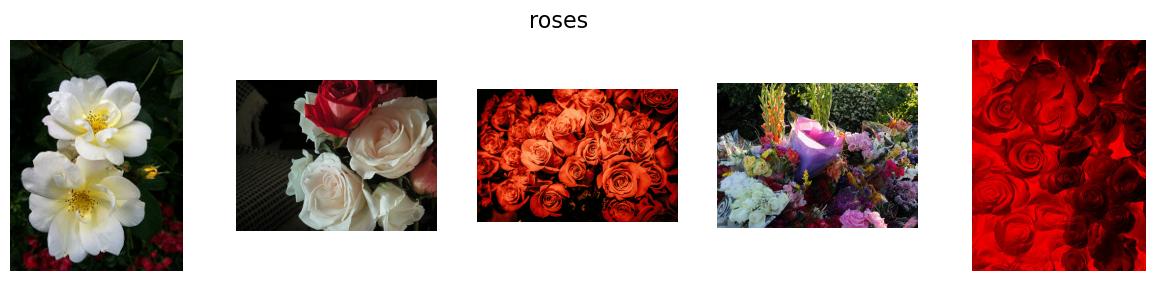

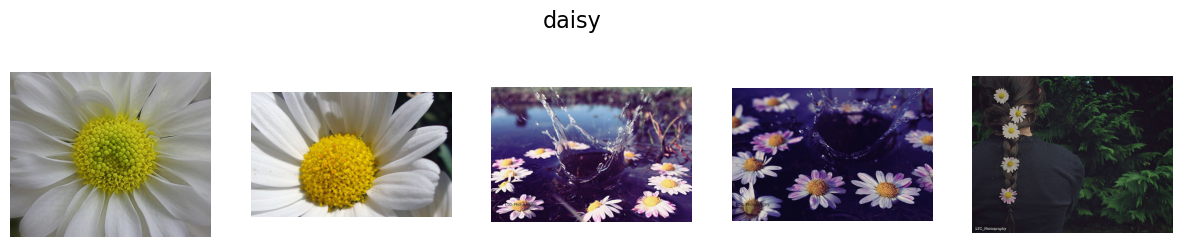

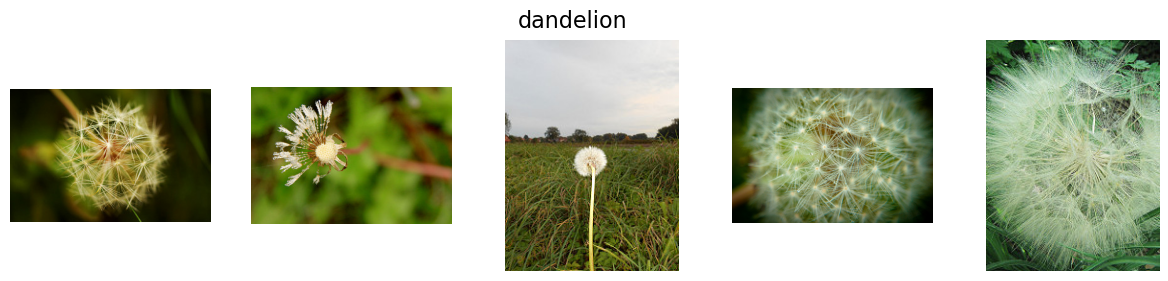

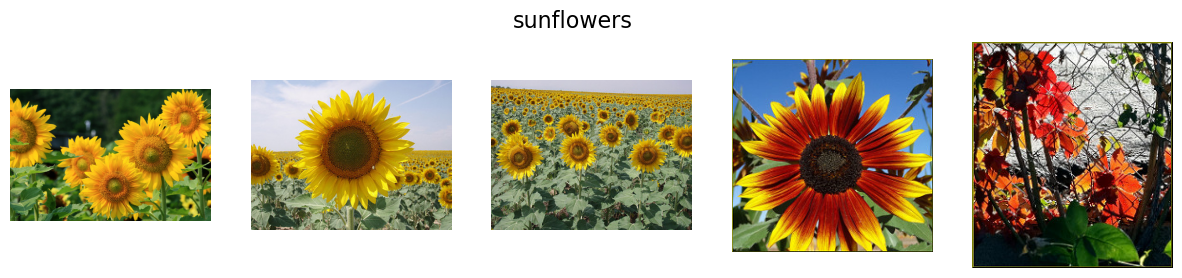

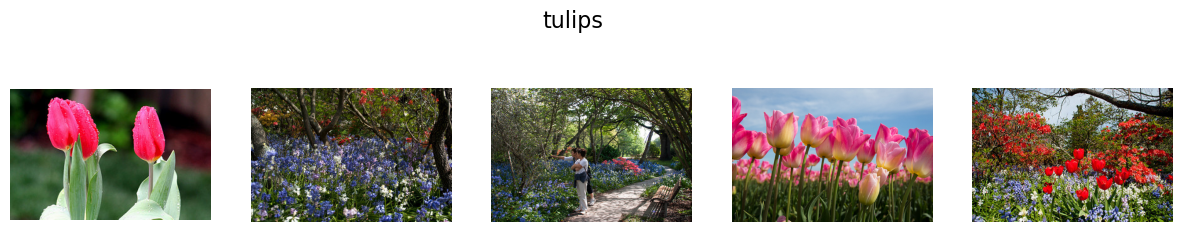

In [9]:
for title, path in images_dict.items():
    display_images(title, path)

In [10]:
X, y = [], []

for name, paths in images_dict.items():
    for path in paths:
        img = cv2.imread(str(path))
        resized = cv2.resize(img,(180,180))
        X.append(resized)
        y.append(labels_dict[name])

In [11]:
X = np.array(X)
y = np.array(y)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [13]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [14]:
data_augmentation = keras.Sequential(
  [
      layers.RandomFlip("horizontal"),
      layers.RandomRotation(0.1),
      layers.RandomZoom(0.1),
  ]
)

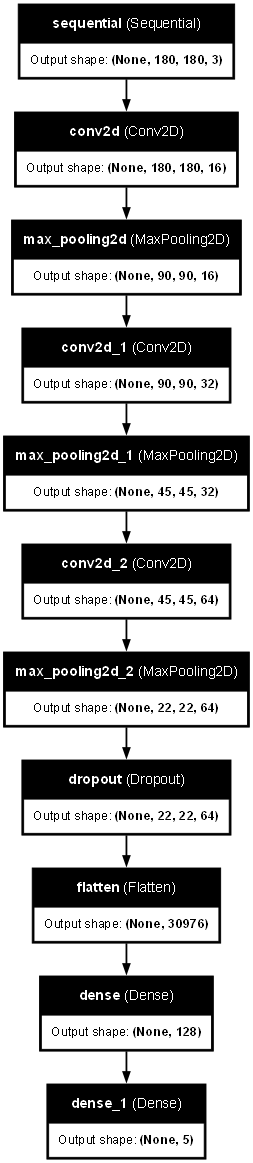

In [15]:
model = Sequential([
    layers.InputLayer(shape=(180, 180, 3)),
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, dpi=64)

In [16]:
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 222ms/step - accuracy: 0.3197 - loss: 1.5082
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 228ms/step - accuracy: 0.5251 - loss: 1.1466
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 224ms/step - accuracy: 0.6272 - loss: 0.9686
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 224ms/step - accuracy: 0.6589 - loss: 0.8869
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 217ms/step - accuracy: 0.6651 - loss: 0.8392
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 215ms/step - accuracy: 0.6949 - loss: 0.7863
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 213ms/step - accuracy: 0.7192 - loss: 0.7118
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 214ms/step - accuracy: 0.7465 - loss: 0.6696
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 230ms/step - accuracy: 0.7599 - loss: 0.6652
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 223ms/step - accuracy: 0.7554 - loss: 0.6198
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 215ms/step - accuracy: 0.7615 - loss: 0.6250
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 19

In [17]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.7092 - loss: 0.9572


[0.9621177911758423, 0.7233115434646606]

In [20]:
sample_images = [
    'https://www.geturns.com/cdn/shop/articles/Thumbnail_1200x.jpg?v=1708690865',
    'https://www.phoolwala.com/images/product/pw-12-r-r-vase.jpg',
    'https://i0.wp.com/kakoliscorner.in/wp-content/uploads/2023/05/Crochet-Forever-Tulip-Flower-in-India.jpg?fit=1836%2C1836&ssl=1',
    'https://i.pinimg.com/736x/51/eb/eb/51ebeb1fc67e9125e2d35abcf4f8b471.jpg',
    'https://i.pinimg.com/474x/2b/63/08/2b63081e3f7c5fe616b519c58ed1d734.jpg'
]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


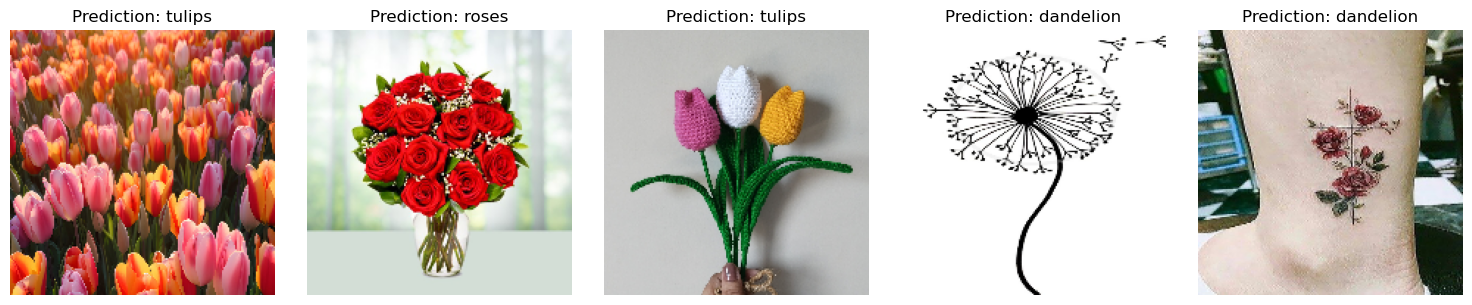

In [21]:
num_images = len(sample_images)

fig, axes = plt.subplots(nrows=1, ncols=num_images, figsize=(15, 3))

for i, url in enumerate(sample_images):
    response = requests.get(url)
    img = np.array(Image.open(BytesIO(response.content)))
    resized = cv2.resize(img, (180, 180))
    axes[i].imshow(resized)
    axes[i].axis('off')

    img_array = np.expand_dims(resized.astype('float32') / 255, axis=0)
    pred = model.predict(img_array)
    predicted_label = np.argmax(pred)
    axes[i].set_title(f'Prediction: {list(labels_dict.keys())[list(labels_dict.values()).index(predicted_label)]}')

plt.tight_layout()
plt.show()